## Sandton And Soweto Business Opportunity For Ncube Inc Notebook

This notebook details the analysis of the data gathered from Statistics South Africa and Foursquare location data in order to come up with a conclusion on the best location for opening a fast food chain branch between either Soweto or Sandton the neighbourhoods in Gauteng, South africa.

So we are going to use two already prepared .csv files containing data about the two locations. 

Importing all the necessary libraries for data analysis

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0         conda-forge
    geopy:         1.20.0-py_0       conda-forge

The following p

After importing the necessary packages we then read our .csv data files into dataframes using pandas below.

In [113]:
soweto_df = pd.read_csv('soweto.csv') # Coverting .csv to a dataframe
sandton_df = pd.read_csv('sandton.csv') # Coverting .csv to a dataframe
sandton_df.shape# The number of rows and figures

(96, 2)

In [114]:
soweto_df.shape # The number of rows and figures

(96, 2)

Cleaning data for both files below

In [115]:
sandton_df = sandton_df[~sandton_df['Characteristics'].isin(['Other', 'None'])] # Dropping rows with values that are incomprehensible written none and other
sandton_df.rename(columns={'Figures':'Sandton Figures'}, # Renaming the Figures column for Sandton to differentiate it from the Soweto column.
                 inplace=True)
sandton_df.shape # The number of rows and figures


(89, 2)

In [116]:
soweto_df = soweto_df[~soweto_df['Characteristics'].isin(['Other', 'None'])] # Dropping rows with values that are incomprehensible written none and other
soweto_df.rename(columns={'Figure':'Soweto Figures'},  # Renaming the Figures column for Soweto to differentiate it from the Sandton column.
                 inplace=True)
soweto_df.shape # The number of rows and figures


(89, 2)

##### Merging the data for both the locations to create a comparative dataframe and further cleaning of data

In [226]:
sandton_soweto = pd.merge(left=sandton_df,right=soweto_df, how='left', left_on='Characteristics', right_on='Characteristics') # merging the two dataframes into one main dataframe
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['authority/private company', 'at least once a week','less often'])] #dropping the rows observed to be having null values.
sandton_soweto

,Characteristics,Sandton Figures,Soweto Figures
0,Total population,222415.00,1271628.00
1,Young (0-14),17.50,24.70
2,Working Age (15-64),75.20,71.00
3,Elderly (65+),7.30,4.20
4,Dependency ratio,33.00,40.80
5,Sex ratio,90.70,98.50
6,Population density-persons/km2,1550.00,6357.00
7,No schooling aged 20+,1.30,3.10
8,Higher education aged 20+,56.40,9.30
9,Matric aged 20+,24.60,38.30


In [157]:
sandton_soweto.dtypes

Sandton Figures    float64
Soweto Figures     float64
dtype: object

##### Extracting the Non-percentile data to create a dataframe for population figures only.

In [162]:
population_df = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['Total population', 'Population density-persons/km2','Number of households','Average household size'])]
population_df

,Characteristics,Sandton Figures,Soweto Figures
0,Total population,222415.0,1271628.0
6,Population density-persons/km2,1550.0,6357.0
10,Number of households,94343.0,355331.0
11,Average household size,2.2,3.4


##### Plotting the bar graph to visualise the population distribution between the two locations

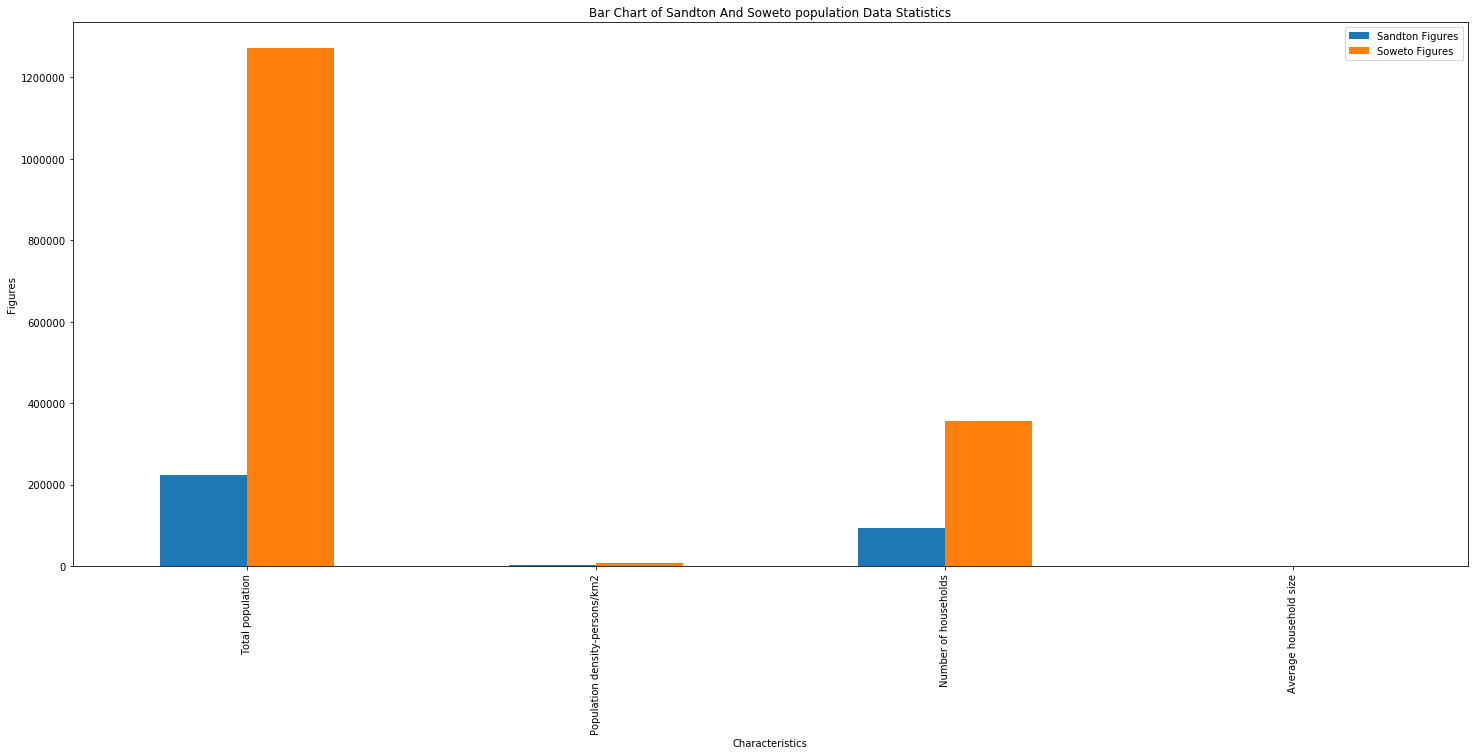

In [193]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# generate and visualise bar graphs for the population_df data set 
population_df.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto population Data Statistics')
plt.ylabel('Figures')
plt.xlabel('Characteristics')
plt.show()



##### Extracting the income distribution for the two locations

In [145]:
income_df = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['No income', 'R1 - R4,800','R4,801 - R9,600','R9,601 - R19,600','R19,601 - R38,200','R38,201 - R76,400','R76,401 - R153,800','R153,801 - R307,600','R307,601 - R614,400','R614,001 - R1,228,800','R1,228,801 - R2,457,600','R2,457,601+'])]
income_df

,Characteristics,Sandton Figures,Soweto Figures
81,No income,0.07,18.7
82,"R1 - R4,800",0.80,4.1
83,"R4,801 - R9,600",0.90,5.5
84,"R9,601 - R19,600",3.40,13.9
85,"R19,601 - R38,200",10.70,18.4
86,"R38,201 - R76,400",6.40,17.6
87,"R76,401 - R153,800",0.07,12.1
88,"R153,801 - R307,600",13.90,6.6
89,"R307,601 - R614,400",19.90,2.4
90,"R614,001 - R1,228,800",18.10,0.4


##### Plotting the bar graph to visualise the income distribution between the two locations

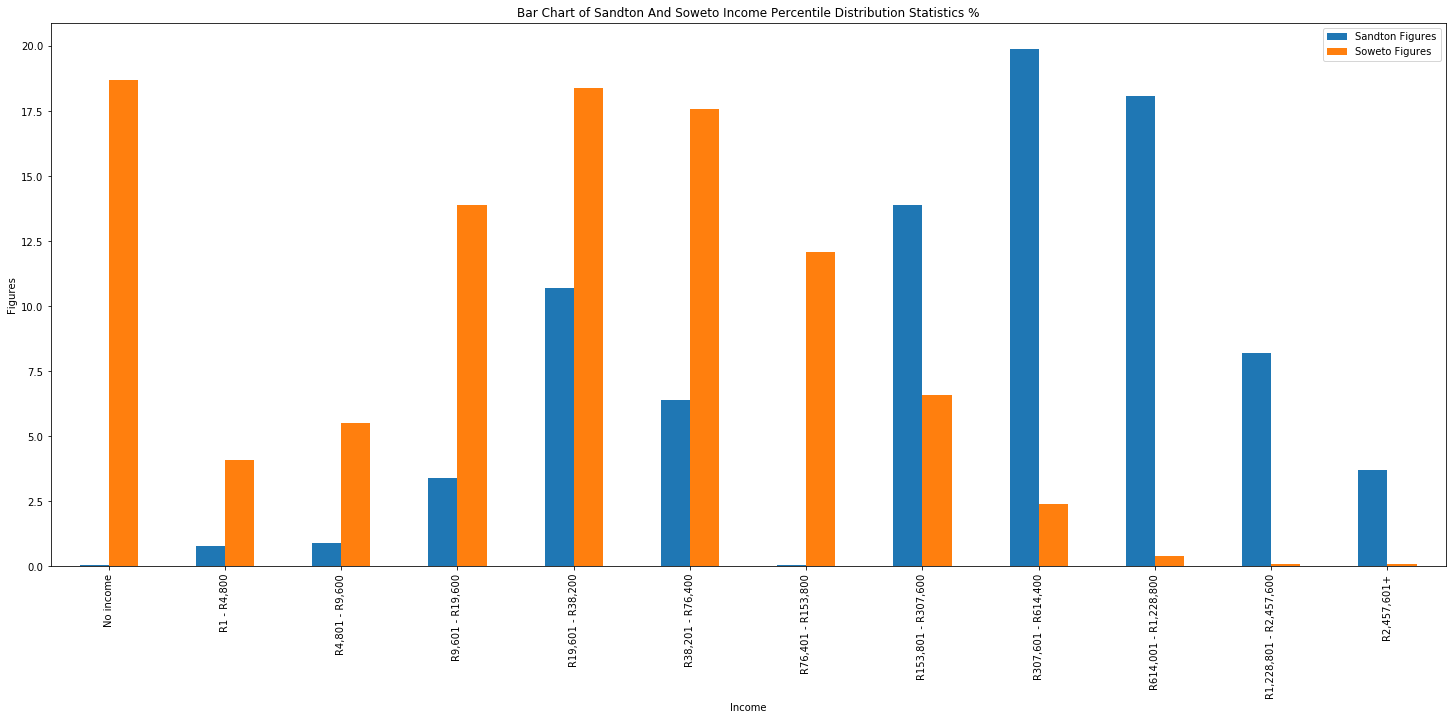

In [214]:
income_df.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto Income Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Income')
plt.show()



#### And the line graph

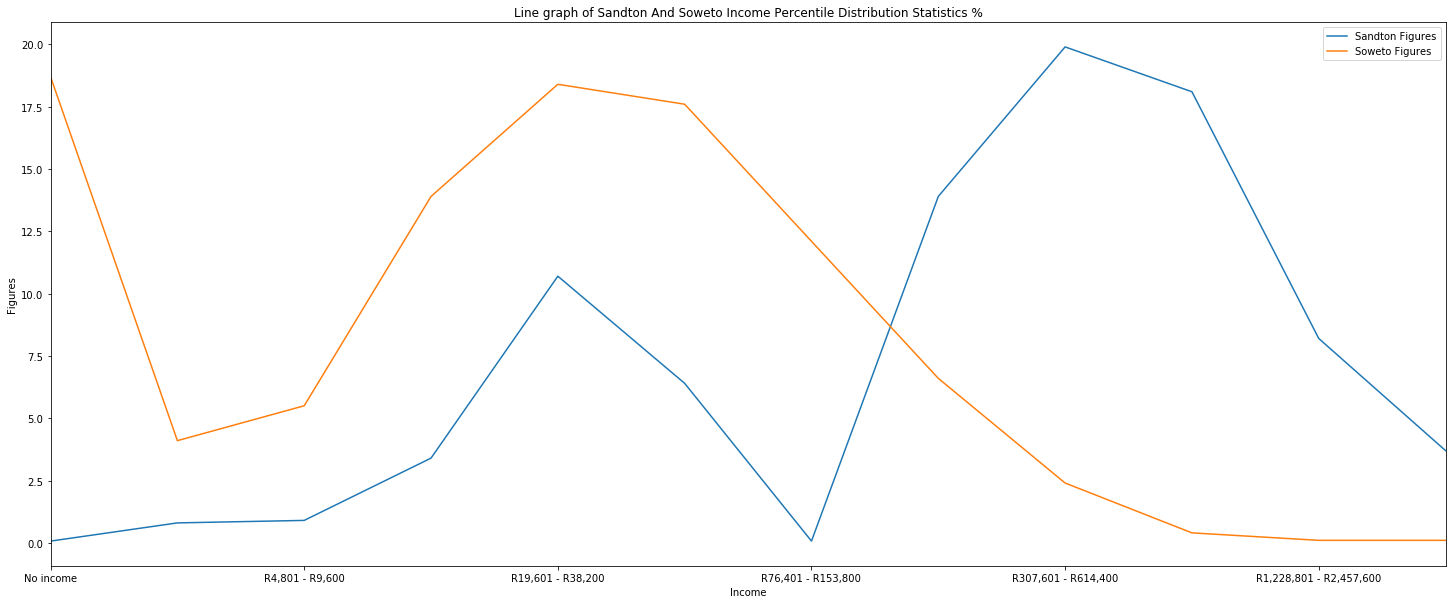

In [216]:
income_df.plot(kind='line',figsize=(25, 10))
plt.title('Line graph of Sandton And Soweto Income Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Income')
plt.show()


##### Extracting the marital status distribution percentages for the population between the two locations

In [153]:
marital_status = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['Married','Living together','Never married','Widower/Widow','Separated','Divorced'])]
marital_status

,Characteristics,Sandton Figures,Soweto Figures
23,Married,40.7,19.2
24,Living together,7.2,8.7
25,Never married,44.2,67.1
26,Widower/Widow,3.0,3.1
27,Separated,0.7,0.6
28,Divorced,4.1,1.4


##### Plotting the bar graph to visualise the marital status distribution between the two locations

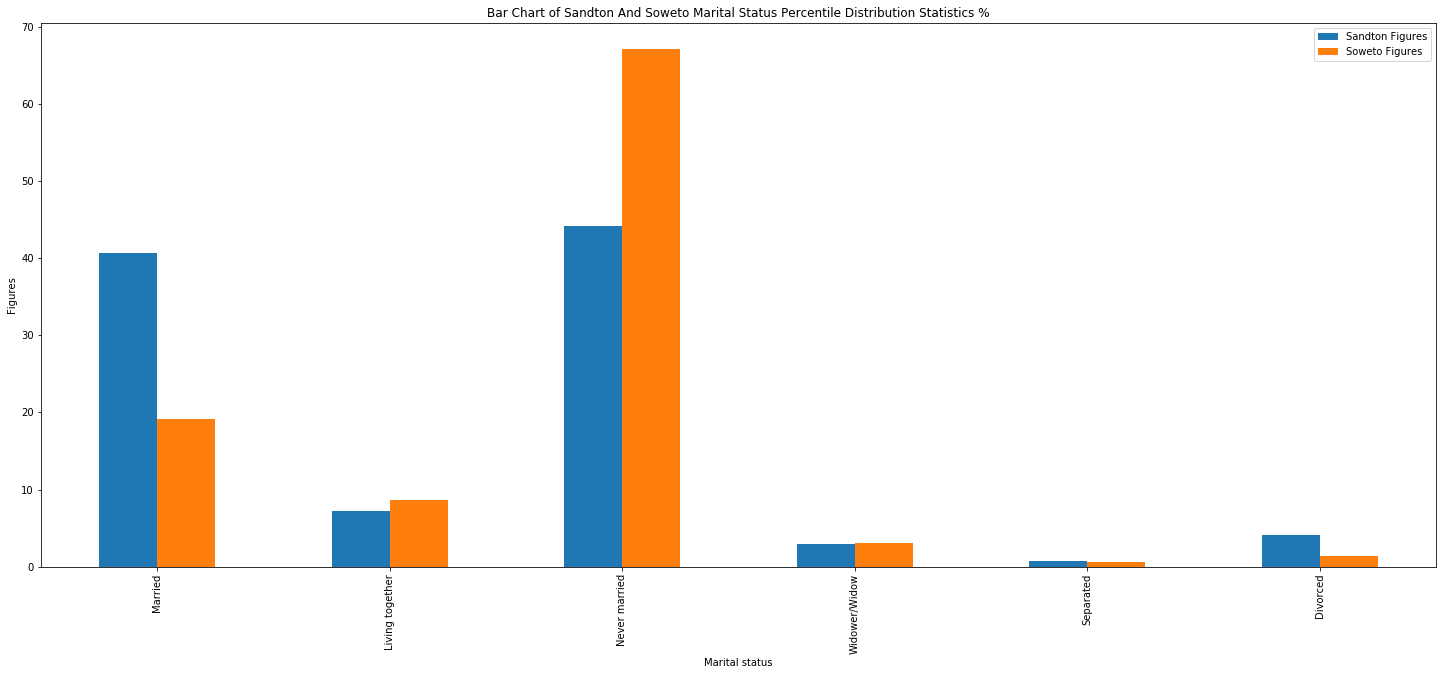

In [224]:
marital_status.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto Marital Status Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Marital status')
plt.show()

##### Extracting the gender distribution percentages for the population between the two locations and visualizing data

In [163]:
gender_df = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['Male','Female'])]
gender_df

,Characteristics,Sandton Figures,Soweto Figures
35,Male,47.6,49.6
36,Female,52.4,50.4


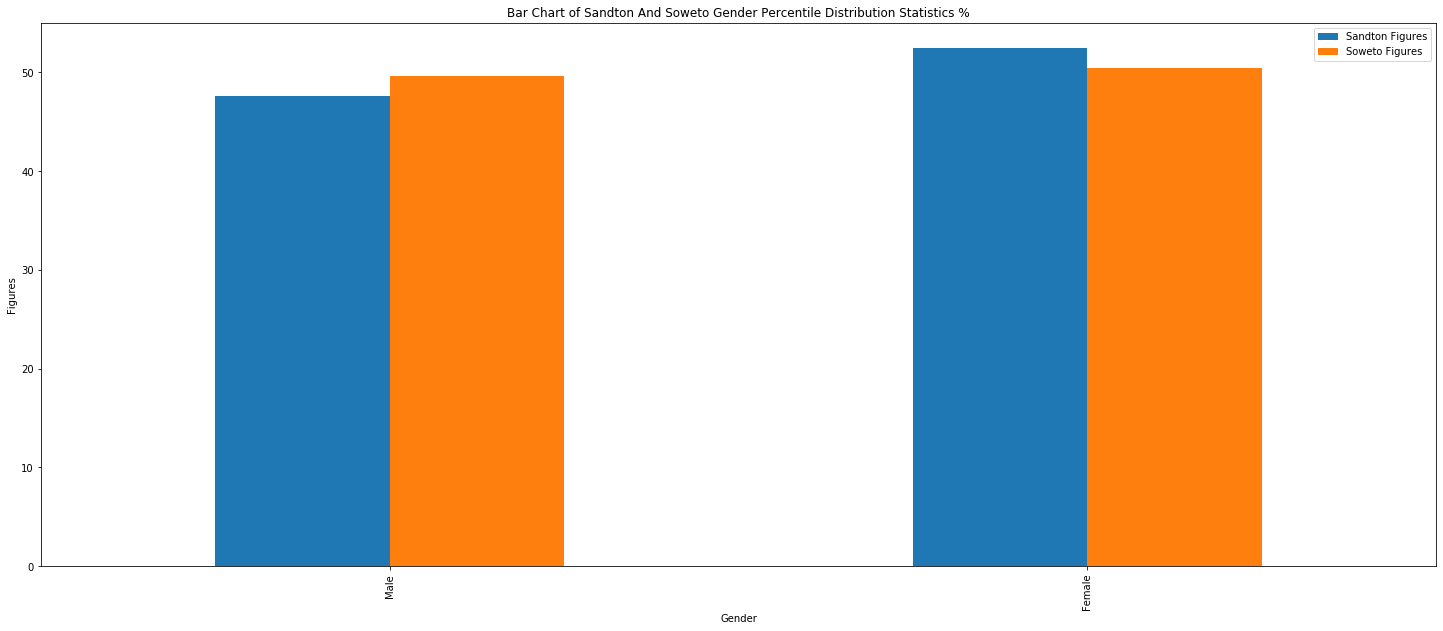

In [212]:
gender_df.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto Gender Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Gender')
plt.show()

##### Extracting the race distribution percentages for the population between the two locations and visualizing data

In [166]:
race_df = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['Black African','Coloured','Indian/Asian','White'])]
race_df

,Characteristics,Sandton Figures,Soweto Figures
19,Black African,34.7,98.5
20,Coloured,2.5,1.0
21,Indian/Asian,11.1,0.1
22,White,49.8,0.1


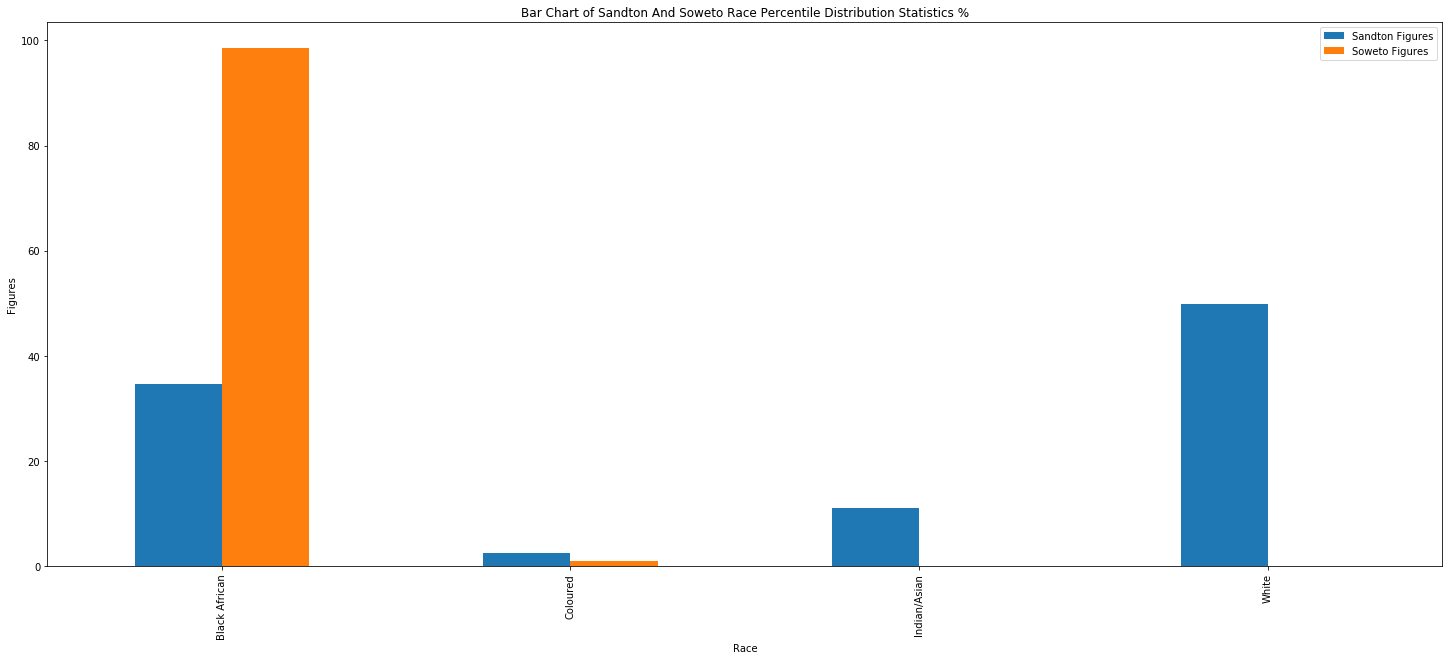

In [211]:
race_df.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto Race Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Race')
plt.show()

##### Extracting the Education level distribution percentages for the population between the two locations and visualizing data

In [169]:
education_df = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['No Schooling','Some Primary','Completed Primary','Some Secondary','Matric','Higher Education'])]
education_df

,Characteristics,Sandton Figures,Soweto Figures
29,No Schooling,1.3,3.1
30,Some Primary,3.1,7.9
31,Completed Primary,1.7,3.7
32,Some Secondary,12.9,37.5
33,Matric,24.6,38.3
34,Higher Education,56.4,9.3


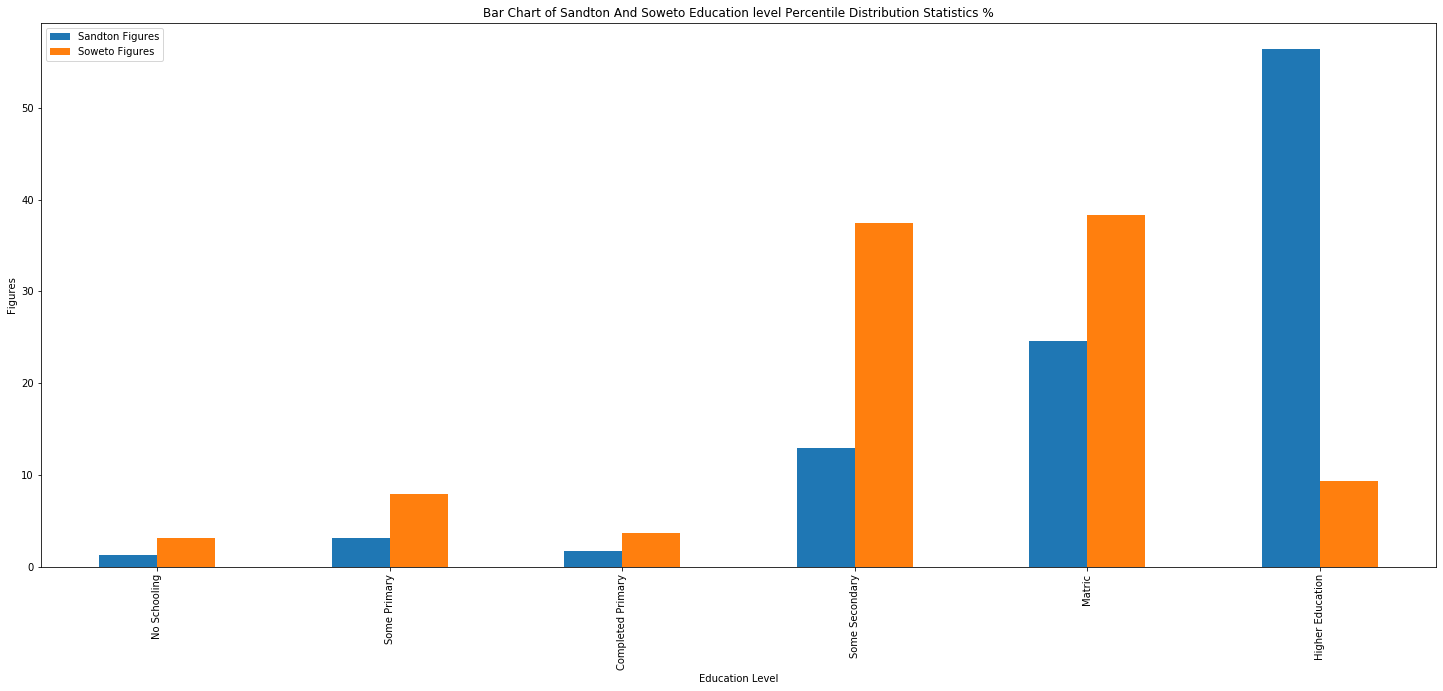

In [210]:
education_df.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto Education level Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Education Level')
plt.show()

##### Extracting the Personal movable assets for a weath measure distribution percentages for the population between the two locations and visualizing data

In [180]:
wealth_df = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['Refrigerator','Electric / Gas-Stove','Computer','Satellite Television','Motor Car','Television','Radio','Landline / Telephone','Cellphone','Electricity','Gas'])]
wealth_df

,Characteristics,Sandton Figures,Soweto Figures
37,Refrigerator,90.80,77.60
38,Electric / Gas-Stove,93.60,89.50
39,Computer,70.60,20.20
40,Satellite Television,69.10,24.40
41,Motor Car,77.80,23.60
42,Television,93.30,85.90
43,Radio,80.60,74.20
44,Landline / Telephone,48.60,14.50
45,Cellphone,97.80,93.40
46,Electricity,0.89,92.80


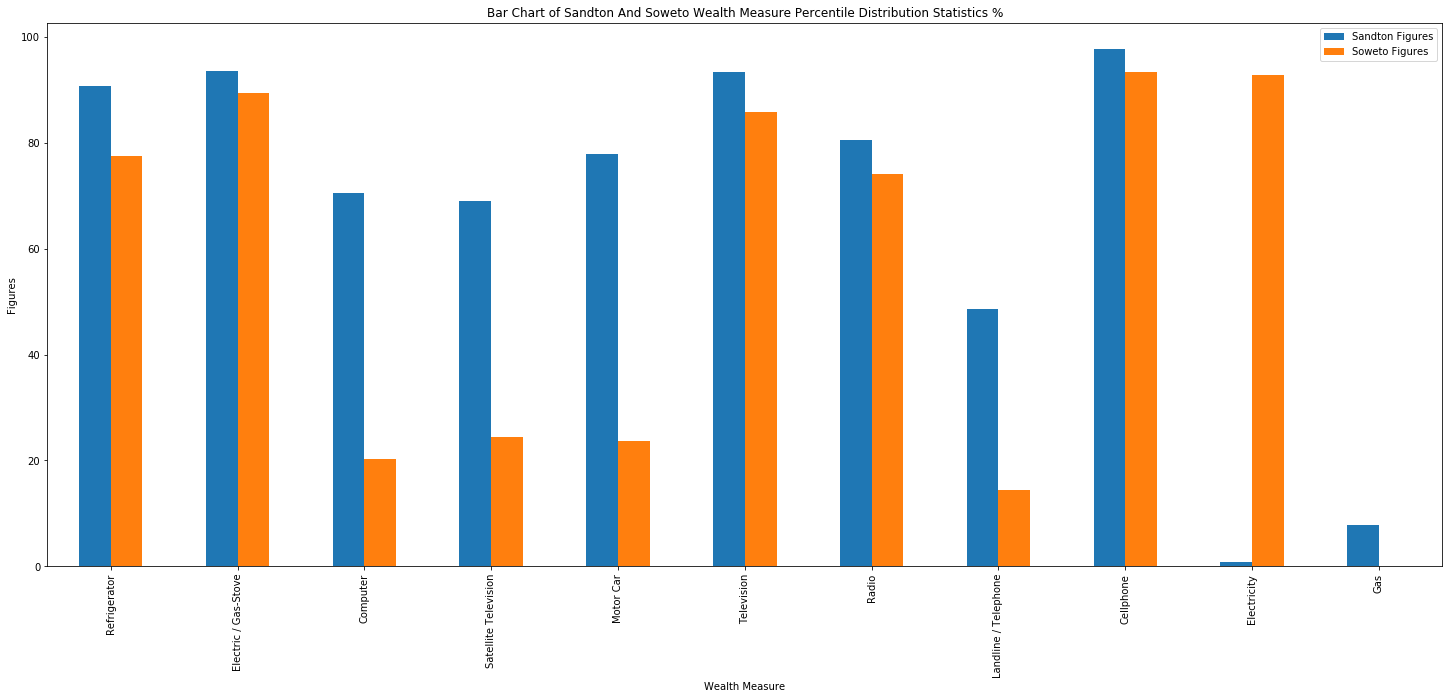

In [209]:
wealth_df.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto Wealth Measure Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Wealth Measure')
plt.show()

##### Extracting the family setup distribution percentages for the population between the two locations and visualizing data

In [218]:
family_df = sandton_soweto.loc[sandton_soweto['Characteristics'].isin(['Young (0-14)','Working Age (15-64)','Elderly (65+)','Dependency ratio','Sex ratio','No schooling aged 20+','Higher education aged 20+','Matric aged 20+','Female headed households','Formal dwellings','Housing owned/paying off'])]
family_df

,Characteristics,Sandton Figures,Soweto Figures
1,Young (0-14),17.5,24.7
2,Working Age (15-64),75.2,71.0
3,Elderly (65+),7.3,4.2
4,Dependency ratio,33.0,40.8
5,Sex ratio,90.7,98.5
7,No schooling aged 20+,1.3,3.1
8,Higher education aged 20+,56.4,9.3
9,Matric aged 20+,24.6,38.3
12,Female headed households,40.6,40.3
13,Formal dwellings,96.6,84.2


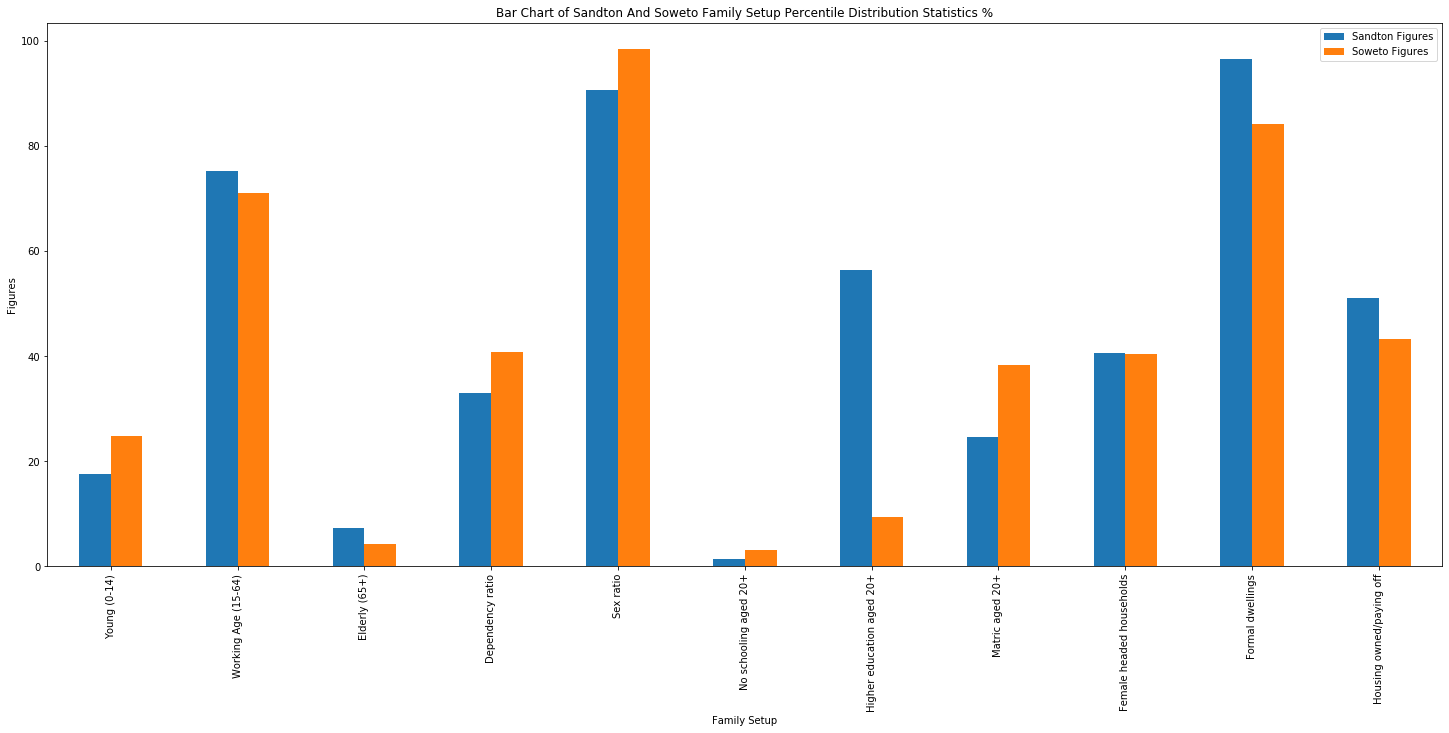

In [222]:
family_df.plot(kind='bar',figsize=(25, 10))
plt.title('Bar Chart of Sandton And Soweto Family Setup Percentile Distribution Statistics %')
plt.ylabel('Figures')
plt.xlabel('Family Setup')
plt.show()

##### Dropping the  dataframes which have been extracted from the  sandton_soweto dataframe to reclean the main dataframe.

In [225]:
# Dropping the extracted dataframes from the main dataframe
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['Total population', 'Population density-persons/km2','Number of households','Average household size'])]
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['No income', 'R1 - R4,800','R4,801 - R9,600','R9,601 - R19,600','R19,601 - R38,200','R38,201 - R76,400','R76,401 - R153,800','R153,801 - R307,600','R307,601 - R614,400','R614,001 - R1,228,800','R1,228,801 - R2,457,600','R2,457,601+'])]
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['Married','Living together','Never married','Widower/Widow','Separated','Divorced'])]
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['Male','Female'])]
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['Black African','Coloured','Indian/Asian','White'])]
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['No Schooling','Some Primary','Completed Primary','Some Secondary','Matric','Higher Education'])]
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['Refrigerator','Electric / Gas-Stove','Computer','Satellite Television','Motor Car','Television','Radio','Landline / Telephone','Cellphone','Electricity','Gas'])]
sandton_soweto = sandton_soweto[~sandton_soweto['Characteristics'].isin(['Young (0-14)','Working Age (15-64)','Elderly (65+)','Dependency ratio','Sex ratio','No schooling aged 20+','Higher education aged 20+','Matric aged 20+','Female headed households','Formal dwellings','Housing owned/paying off'])]
sandton_soweto

,Characteristics,Sandton Figures,Soweto Figures
15,Flush toilet connected to sewerage,0.97,91.6
16,Weekly refuse removal,97.80,96.5
17,Piped water inside dwelling,93.90,55.0
18,Electricity for lighting,97.80,93.1
48,Paraffin,1.60,5.6
49,Solar,0.10,0.2
50,Candles,0.00,0.0
51,Wood,0.10,0.1
52,Coal,0.00,0.1
53,Animal Dung,0.10,0.0


## Then we had to gather the location data from Foursquare for the two locations in order to gain more insights about the two distinct places for a conclusive decision making

### Import necessary libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0         conda-forge
    geopy:         1.20.0-py_0       conda-forge

The following p

In [3]:
CLIENT_ID = 'U5XIA3CVBSHBM1XXVRWSITJ2C4ED0LC5I04ZBUXGNIWIY3FY' # My Foursquare ID
CLIENT_SECRET = 'WMQ4UEMY3J3RIR2MS5OEGAXN0LTLXDI3DM1YMPWRNLH1QOIJ' # My Foursquare Secret
VERSION = '20191111'
LIMIT = 50
print('My credentails are:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails are:
CLIENT_ID: U5XIA3CVBSHBM1XXVRWSITJ2C4ED0LC5I04ZBUXGNIWIY3FY
CLIENT_SECRET:WMQ4UEMY3J3RIR2MS5OEGAXN0LTLXDI3DM1YMPWRNLH1QOIJ


### Define the coordinates for the two locations

In [4]:
soweto_latitude = -26.2437245
soweto_longitude = 27.7682312  
sandton_latitude =  -26.0970943   
sandton_longitude = 28.0292799

In [5]:
search_query = 'fast food'
radius = 10000 # For a 10 km radius
print(search_query + ' .... OK!')

fast food .... OK!


In [6]:
## 1. Search for the specific venue category in Soweto
soweto_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, soweto_latitude, soweto_longitude, VERSION, search_query, radius, LIMIT)
soweto_url

'https://api.foursquare.com/v2/venues/search?client_id=U5XIA3CVBSHBM1XXVRWSITJ2C4ED0LC5I04ZBUXGNIWIY3FY&client_secret=WMQ4UEMY3J3RIR2MS5OEGAXN0LTLXDI3DM1YMPWRNLH1QOIJ&ll=-26.2437245,27.7682312&v=20191111&query=fast food&radius=10000&limit=50'

### Showing the search results for Soweto fast food restaurants

In [7]:
soweto_results = requests.get(soweto_url).json()
soweto_results

{'meta': {'code': 200, 'requestId': '5dca62128ad62e0039d48e2f'},
 'response': {'venues': [{'id': '53ec502a498e9af7ab5c0449',
    'name': 'Fast food Chillas',
    'location': {'address': '79',
     'crossStreet': 'Elias madia crescent',
     'lat': -26.16687,
     'lng': 27.79473,
     'labeledLatLngs': [{'label': 'display',
       'lat': -26.16687,
       'lng': 27.79473}],
     'distance': 8955,
     'cc': 'ZA',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['79 (Elias madia crescent)', 'iNingizimu Afrika']},
    'categories': [{'id': '4edd64a0c7ddd24ca188df1a',
      'name': 'Fish & Chips Shop',
      'pluralName': 'Fish & Chips Shops',
      'shortName': 'Fish & Chips',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fishandchips_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1573544466',
    'hasPerk': False},
   {'id': '4cb9f919adcd5481b72f20a2',
    'name': "Shaheem's fast foods",
    'location': {'address': 'Main 

In [9]:
## 1. Search for the specific venue category in Sandton
sandton_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, sandton_latitude, sandton_longitude, VERSION, search_query, radius, LIMIT)
sandton_url

'https://api.foursquare.com/v2/venues/search?client_id=U5XIA3CVBSHBM1XXVRWSITJ2C4ED0LC5I04ZBUXGNIWIY3FY&client_secret=WMQ4UEMY3J3RIR2MS5OEGAXN0LTLXDI3DM1YMPWRNLH1QOIJ&ll=-26.0970943,28.0292799&v=20191111&query=fast food&radius=10000&limit=50'

### Showing the search results for Sandton fast food restaurants

In [10]:
sandton_results = requests.get(sandton_url).json()
sandton_results

{'meta': {'code': 200, 'requestId': '5dca6246f96b2c002c4295b6'},
 'response': {'venues': [{'id': '5373370b498edf7397936019',
    'name': "Mo-zo's Fast Food",
    'location': {'address': 'Randpark Ridge',
     'lat': -26.0932,
     'lng': 27.938,
     'labeledLatLngs': [{'label': 'display', 'lat': -26.0932, 'lng': 27.938}],
     'distance': 9135,
     'cc': 'ZA',
     'country': 'iNingizimu Afrika',
     'formattedAddress': ['Randpark Ridge', 'iNingizimu Afrika']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1573544518',
    'hasPerk': False},
   {'id': '4dd143b822718eed7a7bde4b',
    'name': 'B-Spot Fast Food & Take Aways',
    'location': {'address': 'University of Johannesburg',
     'lat': -26.182643202039934

In [11]:
# assign relevant part of JSON to venues
soweto_venues = soweto_results['response']['venues']

# tranform venues into a dataframe
sodataframe = json_normalize(soweto_venues)
sodataframe

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.postalCode,location.city,location.state
0,53ec502a498e9af7ab5c0449,Fast food Chillas,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",v-1573544466,False,79,Elias madia crescent,-26.166870,27.794730,"[{'label': 'display', 'lat': -26.16687, 'lng':...",8955,ZA,iNingizimu Afrika,"[79 (Elias madia crescent), iNingizimu Afrika]",NaN,NaN,NaN
1,4cb9f919adcd5481b72f20a2,Shaheem's fast foods,[],v-1573544466,False,Main Road,Kremetart,-26.281566,27.876296,"[{'label': 'display', 'lat': -26.2815656807173...",11581,ZA,iNingizimu Afrika,"[Main Road (Kremetart), Soweto, 1811, iNingizi...",1811,Soweto,IGauteng
2,519654c4498edda8501e3f37,Akhalwaya's Fast Foods,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",v-1573544466,False,NaN,NaN,-26.322273,27.859609,"[{'label': 'display', 'lat': -26.3222725174936...",12634,ZA,iNingizimu Afrika,[iNingizimu Afrika],NaN,NaN,NaN
3,52ff6103498e27cc18334a14,Food Lover's Market,"[{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...",v-1573544466,False,Jabulani Mall,Cnr. Koma & Bolani Rd. Jabulani,-26.249776,27.856479,"[{'label': 'display', 'lat': -26.2497759125764...",8836,ZA,iNingizimu Afrika,[Jabulani Mall (Cnr. Koma & Bolani Rd. Jabulan...,1868,Soweto,IGauteng
4,59ea046c1fa7632d4c73bc80,Food Lover's Market Jabulani,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1573544466,False,Cnr Koma & Bolani Road,NaN,-26.250863,27.857352,"[{'label': 'display', 'lat': -26.25086309, 'ln...",8933,ZA,iNingizimu Afrika,"[Cnr Koma & Bolani Road, EGoli, 1818, iNingizi...",1818,EGoli,IGauteng
5,4fe1677ee4b03d269379abd1,Cambridge Food Jabulani,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1573544466,False,Koma Street,Bolani,-26.249394,27.855580,"[{'label': 'display', 'lat': -26.2493936209508...",8743,ZA,iNingizimu Afrika,"[Koma Street (Bolani), Soweto, iNingizimu Afrika]",NaN,Soweto,IGauteng
6,4e310d47a809ef7b4ec9a9fc,Foodcorp,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1573544466,False,NaN,NaN,-26.185133,27.693758,"[{'label': 'display', 'lat': -26.1851329803466...",9892,ZA,iNingizimu Afrika,[iNingizimu Afrika],NaN,NaN,NaN
7,504eeee77ab441c6c8589b0b,Food Lovers Market - Dobsonville,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",v-1573544466,False,75 Roodepoort Road,Shop 69 Mmesi Park,-26.213343,27.869591,"[{'label': 'display', 'lat': -26.213343, 'lng'...",10671,ZA,iNingizimu Afrika,"[75 Roodepoort Road (Shop 69 Mmesi Park), Sowe...",NaN,Soweto,IGauteng
8,50339793e4b0c88bbd6f1cb7,DiMamzo's Food Palace,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1573544466,False,NaN,NaN,-26.273250,27.868210,"[{'label': 'display', 'lat': -26.27325, 'lng':...",10508,ZA,iNingizimu Afrika,[iNingizimu Afrika],NaN,NaN,NaN
9,5d1c39fa6d22da002f7d1dde,AGT Foods,"[{'id': '4eb1bea83b7b6f98df247e06', 'name': 'F...",v-1573544466,False,"8 Jacobs Street, Chamdor",NaN,-26.159500,27.799488,"[{'label': 'display', 'lat': -26.1595001220703...",9881,ZA,iNingizimu Afrika,"[8 Jacobs Street, Chamdor, Krugersdorp, 1754, ...",1754,Krugersdorp,IGauteng


In [12]:
# assign relevant part of JSON to venues
sandton_venues = sandton_results['response']['venues']

# tranform venues into a dataframe
sadataframe = json_normalize(sandton_venues)
sadataframe

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.postalCode,location.city,location.state,location.crossStreet,venuePage.id
0,5373370b498edf7397936019,Mo-zo's Fast Food,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1573544518,False,Randpark Ridge,-26.093200,27.938000,"[{'label': 'display', 'lat': -26.0932, 'lng': ...",9135,ZA,iNingizimu Afrika,"[Randpark Ridge, iNingizimu Afrika]",NaN,NaN,NaN,NaN,NaN
1,4dd143b822718eed7a7bde4b,B-Spot Fast Food & Take Aways,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",v-1573544518,False,University of Johannesburg,-26.182643,27.996121,"[{'label': 'display', 'lat': -26.1826432020399...",10083,ZA,iNingizimu Afrika,"[University of Johannesburg, EGoli, 2902, iNin...",2902,EGoli,IGauteng,NaN,NaN
2,4e956fefe5fa7b6a9f1a4698,Lindy's Fast Foods,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",v-1573544518,False,NaN,-26.103996,28.057372,"[{'label': 'display', 'lat': -26.103996, 'lng'...",2911,ZA,iNingizimu Afrika,"[Sandton, iNingizimu Afrika]",NaN,Sandton,IGauteng,NaN,NaN
3,4ec53be28b812a2064f41df1,Food court,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",v-1573544518,False,Sandton City Shopping Centre,-26.108948,28.052663,"[{'label': 'display', 'lat': -26.1089478299051...",2684,ZA,iNingizimu Afrika,"[Sandton City Shopping Centre, iNingizimu Afrika]",NaN,NaN,NaN,NaN,NaN
4,4d2581fd3b62f04dad4d2178,Thora fast foods,[],v-1573544518,False,NaN,-26.102594,28.083860,"[{'label': 'display', 'lat': -26.102594, 'lng'...",5490,ZA,iNingizimu Afrika,"[Sandton, iNingizimu Afrika]",NaN,Sandton,IGauteng,NaN,NaN
5,4f7bdf74e4b00b8c4ba1d576,Tlouza Fast Foods,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1573544518,False,NaN,-26.107256,28.115700,"[{'label': 'display', 'lat': -26.1072559440783...",8712,ZA,iNingizimu Afrika,[iNingizimu Afrika],NaN,NaN,NaN,NaN,NaN
6,4f8021c3e4b0acccb7b26f35,1546 Fast Foods,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",v-1573544518,False,NaN,-26.103915,28.117774,"[{'label': 'display', 'lat': -26.103915, 'lng'...",8879,ZA,iNingizimu Afrika,[iNingizimu Afrika],NaN,NaN,NaN,NaN,NaN
7,4ec64163be7ba4fc6cece9b1,Akhalwayas fast foods,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1573544518,False,Carr street,-26.201035,28.021711,"[{'label': 'display', 'lat': -26.2010353688449...",11595,ZA,iNingizimu Afrika,"[Carr street, Fordsburg, iNingizimu Afrika]",NaN,Fordsburg,IGauteng,NaN,NaN
8,5b718643da2e00002cfc05df,Food Lover's Eatery,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",v-1573544518,False,129 Rivonia Road,-26.102964,28.059211,"[{'label': 'display', 'lat': -26.10296417, 'ln...",3062,ZA,iNingizimu Afrika,"[129 Rivonia Road (Rivonia), Sandton, 2031, iN...",2031,Sandton,IGauteng,Rivonia,507257404
9,4e74515445ddd4323f393c5c,Good Food Studio @ Pick n Pay on Nicol,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1573544518,False,NaN,-26.089569,28.027174,"[{'label': 'display', 'lat': -26.0895687584792...",863,ZA,iNingizimu Afrika,[iNingizimu Afrika],NaN,NaN,NaN,NaN,NaN


### Counting the number of locations found from the dataframe created out of the json file of the Foursquare location data for the two locations.

In [13]:
sadataframe.shape # Sandton number of fast food locations 

(50, 18)

In [14]:
sodataframe.shape # Soweto number of fast food locations 

(12, 17)

## Rename coordinates columns in the above two dataframes

In [15]:
sadataframe.rename(columns={'location.lat':'lat',# Renaming the Sandton dataframe columns
                          'location.lng':'lng'}, 
                 inplace=True)
sodataframe.rename(columns={'location.lat':'lat', # Renaming the Soweto dataframe columns
                          'location.lng':'lng'}, 
                 inplace=True)

### Creating the location markers for the fast food venues in oredr to visualise how sparley or closely located within the given neighboorhoods.

In [85]:
#creating a map that's centered to the coordinates of our location
soweto_map = folium.Map(location=[sodataframe['lat'].mean(), sodataframe['lng'].mean()], zoom_start=12)

callback = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red",  radius: 5});'
                'return circle};')

soweto_map.add_child(FastMarkerCluster(sodataframe[['lat', 'lng']].values.tolist(), callback=callback))
soweto_map

In [84]:
#grab a random sample from df
subset_of_df = sadataframe.sample(n=50)

#creating a map that's centered to the coordinates of our location
sandton_map = folium.Map(location=[sadataframe['lat'].mean(), sadataframe['lng'].mean()], zoom_start=12)

callback = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red",  radius: 5});'
                'return circle};')

sandton_map.add_child(FastMarkerCluster(subset_of_df[['lat', 'lng']].values.tolist(), callback=callback))
sandton_map

## End of the notebook on then location data and the census data analysed.!!